In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
I = np.array([0.0, 0.0150, 0.0305, 0.0466, 0.0600, 0.0751, 0.0900, 0.1052, 0.1202, 0.1349, 0.1501, 0.1649])
Bz = np.array([-0.000014241, 0.000018786, 0.000052116, 0.000086961, 0.000116352, 0.000148467, 0.000180285, 0.000212403, 0.000244218, 0.000275124, 0.000306636, 0.000337542])
dBz = np.array([0.00000030, 0.00000030, 0.00000030, 0.00000030, 0.00000030, 0.00000030, 0.00000030, 0.00000030, 0.00000030, 0.00000030, 0.00000030, 0.00000030])

In [23]:
x = I
y = Bz
dy = dBz

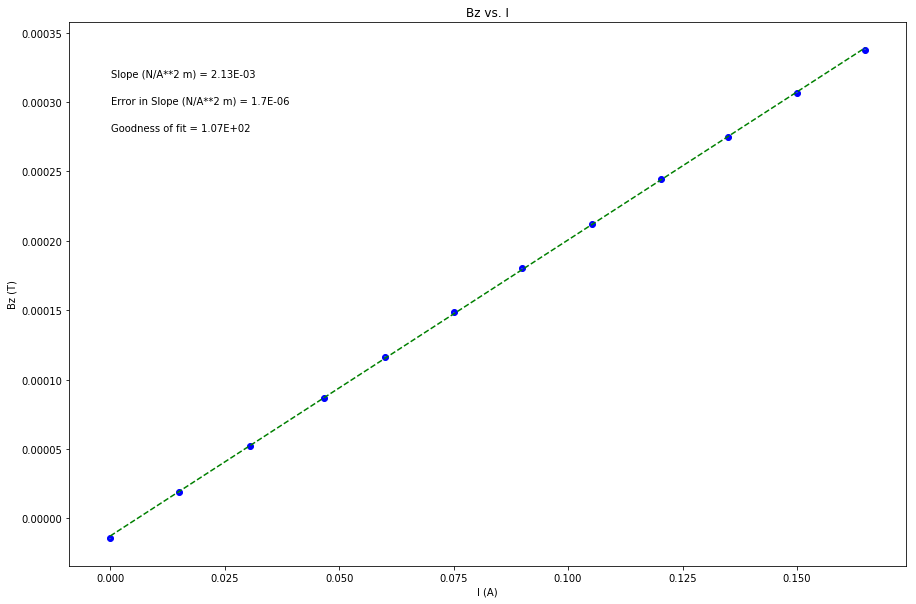

In [24]:
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)
fit = b+m*x
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
dm = np.sqrt(1/D*sum(1/dy**2)) 
db = np.sqrt(1/D*sum(x**2/dy**2))
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
plt.xlabel('I (A)')
plt.ylabel('Bz (T)')
plt.title('Bz vs. I')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none")
plt.annotate('Slope (N/A**2 m) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (N/A**2 m) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
